In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

In [2]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test'

print("Types of images in train dataset: " + str(os.listdir(train_path)))
print("Types of images in test dataset: " + str(os.listdir(test_path)))

Types of images in train dataset: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']
Types of images in test dataset: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


mountain images:


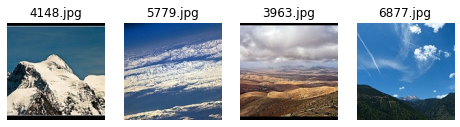

street images:


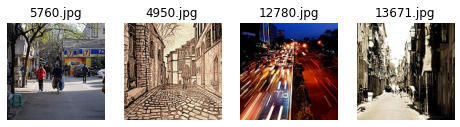

buildings images:


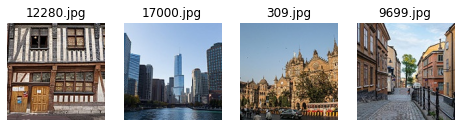

sea images:


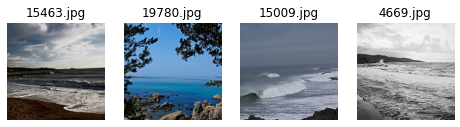

forest images:


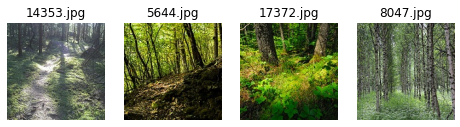

glacier images:


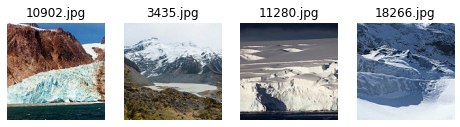

In [4]:
import cv2
rows, cols = (1,4)

for labels in os.listdir(train_path):
    print(f'{labels} images:')
    path = f'{train_path}/{labels}'
    fig = plt.figure(figsize=(8,4))
    for i in range(rows*cols):
        fig.add_subplot(rows, cols, i+1)
        image_id = os.listdir(path)[np.random.randint(0,2000)]
        image = cv2.imread(path + f'/{image_id}')
        plt.imshow(image[:, :, ::-1])
        plt.title(image_id)
        plt.axis('off')
    plt.show()

In [5]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

### Load and Preprocess data

In [6]:
from tqdm import tqdm
def load_data():
    
    datasets = ['/kaggle/input/intel-image-classification/seg_train/seg_train', '/kaggle/input/intel-image-classification/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [7]:
(x_train, y_train), (x_test, y_test) = load_data()

Loading /kaggle/input/intel-image-classification/seg_train/seg_train


100%|██████████| 2404/2404 [00:20<00:00, 119.36it/s]


Loading /kaggle/input/intel-image-classification/seg_test/seg_test


100%|██████████| 553/553 [00:03<00:00, 165.62it/s]


In [8]:
print("x_train.shape: " + str(x_train.shape))
print("y_train.shape: " + str(y_train.shape))
print("x_test.shape: " + str(x_test.shape))
print("y_test.shape: " + str(y_test.shape))

x_train.shape: (14034, 150, 150, 3)
y_train.shape: (14034,)
x_test.shape: (3000, 150, 150, 3)
y_test.shape: (3000,)


In [9]:
# Prepare the labels
from keras.utils import np_utils
num_classes = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [10]:
# Split the Train data into Training & Validation data (90-10)
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

x_val, y_val = x_train[:1400], y_train[:1400]
x_train, y_train = x_train[1400:], y_train[1400:]

print(str(x_train.shape[0]) + ' training examples')
print(str(x_val.shape[0]) + ' validation examples')

12634 training examples
1400 validation examples


In [11]:
# Rescale the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_val = x_val.astype('float32')/255

In [12]:
x_train.shape

(12634, 150, 150, 3)

# Define and Train the Model 

In [13]:
result = {}

### Model 1 (2 Conv + 2 FC)

In [14]:
# # CNN : INPUT -> CONV1 -> POOL1 -> CONV2 -> POOL2 -> DO -> FC1 -> DO -> FC2(SOFTMAX)
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model1 = Sequential()

# # CONV1 & POOL1
# model1.add(Conv2D(filters = 32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
# model1.add(MaxPooling2D(pool_size=(2,2)))

# # CONV2 & POOL2
# model1.add(Conv2D(filters = 64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
# model1.add(MaxPooling2D(pool_size=(2,2)))

# # Flatten
# model1.add(Flatten())

# # DO + FC1
# model1.add(Dropout(rate = 0.4))
# model1.add(Dense(500, activation='relu'))

# # DO + FC2
# model1.add(Dropout(rate = 0.5))
# model1.add(Dense(6, activation='softmax'))

# model1.summary()

In [15]:
# model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# # Train the model
# from keras.callbacks import ModelCheckpoint
# checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

# hist = model1.fit(x_train, y_train, batch_size=32, epochs=10, verbose=2, validation_data=(x_val, y_val), callbacks=[checkpointer])

In [17]:
# model1.load_weights('model.weights.best.hdf5')

In [18]:
# score = model1.evaluate(x_test, y_test)

In [19]:
# train_score = model1.evaluate(x_train, y_train)

In [20]:
# validation_score = model1.evaluate(x_val, y_val)

In [21]:
# result['Model_1'] = score[1]

### Model 2 (4 Conv + 2 FC)

In [22]:
# CNN : INPUT -> CONV1 -> POOL1 -> CONV2 -> POOL2 -> CONV3 -> POOL3 -> CONV4 -> POOL4 -> DO -> FC1 -> DO -> FC2(SOFTMAX)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()

# CONV1 & POOL1
model2.add(Conv2D(filters = 16, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

# CONV2 & POOL2
model2.add(Conv2D(filters = 32, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# CONV3 & POOL3
model2.add(Conv2D(filters = 64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# CONV4 & POOL4
model2.add(Conv2D(filters = 128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model2.add(Flatten())

# DO + FC1
model2.add(Dropout(rate = 0.4))
model2.add(Dense(500, activation='relu'))

# DO + FC2
model2.add(Dropout(rate = 0.5))
model2.add(Dense(6, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

2023-01-05 09:01:22.689865: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model2.fit(x_train, y_train, batch_size=32, epochs=10, verbose=2, validation_data=(x_val, y_val), callbacks=[checkpointer])

2023-01-05 09:01:26.824231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
395/395 - 90s - loss: 0.9768 - accuracy: 0.6167 - val_loss: 0.7111 - val_accuracy: 0.7314

Epoch 00001: val_loss improved from inf to 0.71112, saving model to model.weights.best.hdf5
Epoch 2/10
395/395 - 89s - loss: 0.7058 - accuracy: 0.7397 - val_loss: 0.5605 - val_accuracy: 0.8071

Epoch 00002: val_loss improved from 0.71112 to 0.56046, saving model to model.weights.best.hdf5
Epoch 3/10
395/395 - 89s - loss: 0.5766 - accuracy: 0.7893 - val_loss: 0.5504 - val_accuracy: 0.7986

Epoch 00003: val_loss improved from 0.56046 to 0.55035, saving model to model.weights.best.hdf5
Epoch 4/10
395/395 - 88s - loss: 0.4901 - accuracy: 0.8268 - val_loss: 0.5403 - val_accuracy: 0.8143

Epoch 00004: val_loss improved from 0.55035 to 0.54032, saving model to model.weights.best.hdf5
Epoch 5/10
395/395 - 87s - loss: 0.4363 - accuracy: 0.8448 - val_loss: 0.4619 - val_accuracy: 0.8329

Epoch 00005: val_loss improved from 0.54032 to 0.46191, saving model to model.weights.best.hdf5
Epoch 6/10
395

In [25]:
model2.load_weights('model.weights.best.hdf5')

In [26]:
score = model2.evaluate(x_test, y_test)

94/94 [==============================] - 5s 58ms/step - loss: 0.4266 - accuracy: 0.8560


In [27]:
train_score = model2.evaluate(x_train, y_train)

395/395 [==============================] - 24s 60ms/step - loss: 0.1792 - accuracy: 0.9450


In [28]:
validation_score = model2.evaluate(x_val, y_val)

44/44 [==============================] - 3s 58ms/step - loss: 0.4356 - accuracy: 0.8507


In [29]:
result['Model_2'] = score[1]

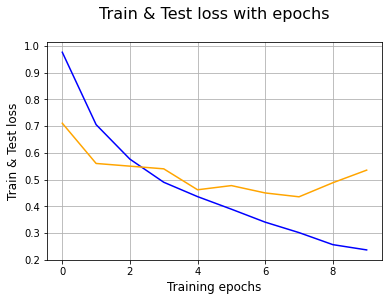

In [30]:
#Plotting results
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test loss", fontsize=12)
plt.show();

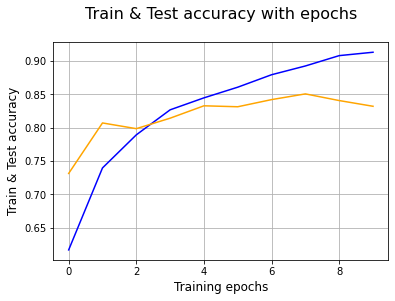

In [31]:
#Plotting results with accuracy
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test accuracy", fontsize=12)
plt.show();

## Make predictions

In [32]:
def display_random_image(class_names, images, labels):
    
    fig = plt.figure(figsize=(40,10))
    for i in range(5):
        index = np.random.randint(images.shape[0])
        fig.add_subplot(5,1,i+1)
        plt.imshow(images[index])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title('Predicte Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

#### Predict with Test Set

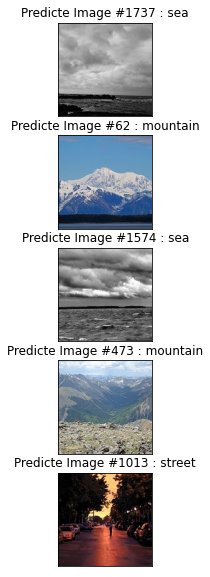

In [33]:
predictions = model2.predict(x_test)
pred_labels = np.argmax(predictions, axis = 1)

display_random_image(class_names, x_test, pred_labels)

### Predict with Pred set(seg_pred)

In [34]:
def load_pred_data(path):
    
    images = []
    
    print("Loading {}".format(path))
        
    for file in tqdm(os.listdir(path)):
        
        image = cv2.imread(path + f'/{file}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)
        
        images.append(image)
    
    images = np.array(images, dtype = 'float32')
    
    return images

In [35]:
pred_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'
x_pred = load_pred_data(pred_path)     

# Rescale:
x_pred = x_pred.astype('float32')/255

Loading /kaggle/input/intel-image-classification/seg_pred/seg_pred


100%|██████████| 7301/7301 [01:02<00:00, 116.44it/s]


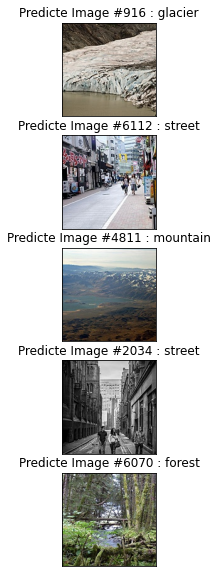

In [36]:
predictions = model2.predict(x_pred)
pred_labels = np.argmax(predictions, axis = 1)

display_random_image(class_names, x_pred, pred_labels)